In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
dados = pd.read_csv('tested.csv', sep=',', encoding='latin-1', on_bad_lines='skip')

### Verficando se os dados estão formatados corretamente


In [116]:
#Verificando as 5 primeiras linhas
dados.head()

,Passageiro-ID,Sobrevivente,Classe,Nome,Sexo,Idade,Parentes,Pais/filhos,NBilhete,ValorTarifa,Cabine,Embarque
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
#Verificando se as linhas e colunas estão corretas
dados.shape

(418, 12)

In [118]:
#Verificando os nomes das colunas 
dados.columns

Index(['Passageiro-ID', 'Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade',
       'Parentes', 'Pais/filhos', 'NBilhete', 'ValorTarifa', 'Cabine',
       'Embarque'],
      dtype='object')

In [119]:
#Resumo estatístico
dados.describe()

,Passageiro-ID,Sobrevivente,Classe,Idade,Parentes,Pais/filhos,ValorTarifa
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [120]:
#Verificando valores nulos
dados.isnull().sum()

Passageiro-ID      0
Sobrevivente       0
Classe             0
Nome               0
Sexo               0
Idade             86
Parentes           0
Pais/filhos        0
NBilhete           0
ValorTarifa        1
Cabine           327
Embarque           0
dtype: int64

##### Colocando um pequeno índice que irá ajudar na compreensão dos dados.


-> PassengerId: um identificador único para cada passageiro.

-> Survived: a resposta que queremos prever. 1 = sobreviveu, 0 = não sobreviveu.

-> Pclass: identifica a classe do bilhete do passageiro. 1 = primeira classe, 2 = segunda classe, 3 = terceira classe. Esta variável 
tem grande relação com o status socioeconômico do passageiro. Primeira classe = alto, segunda classe = médio, terceira classe = baixo.

-> Name: nome do passageiro.

-> Sex: sexo do passageiro.

-> Age: idade em anos. Se a idade do passageiro for menor que 1, então a idade terá um valor fracional (ex.: 0.75). Se a idade do passageiro for estimada, então ela terá o formato XX.5 (ex.: 35.5 para uma idade estimada de 35 anos).

-> SibSp: quantidade de irmãos e cônjuges do passageiro que também estão abordo.

-> Parch: quantidade de pais e filhos do passageiro que também estão abordo.

-> Ticket: número do bilhete do passageiro.

-> Fare: valor da tarifa paga pelo passageiro.

-> Cabin: número da cabine do passageiro.

-> Embarked: porto onde o passageiro embarcou. C = Cherbourg, Q = Queenstown, S = Southampton

### Formantando os dados

In [ ]:
#Renomeando o nome das colunas
dados = dados.rename(columns = {'PassengerId' :'Passageiro-ID' , 'Survived' : 'Sobrevivente', 'Pclass' :'Classe', 'Name' :'Nome',
                                'Sex':'Sexo', 'Age':'Idade', 'SibSp':'Parentes', 'Parch':'Pais/filhos', 'Ticket':'NBilhete','Fare':'ValorTarifa',
                                'Cabin':'Cabine', 'Embarked':'Embarque'})

### Iniciando Limpeza dos dados 


##### Começando por Idade

In [121]:
dados['Idade'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Idade, dtype: float64

In [ ]:
#gráfico de boxplot(Feio)
dfs.boxplot(column='Idade')

In [ ]:
sns.displot(x=dfs['Idade'])

Text(0.5, 1.0, 'Idade')

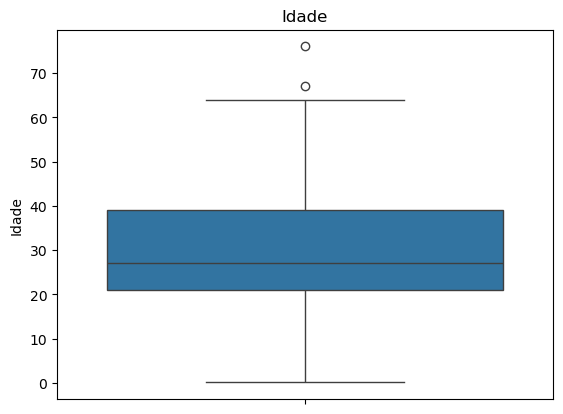

In [129]:
#Verificando os BoxPlot de idade
#gráfico de boxplot(bonito)
sns.boxplot(y=dados['Idade']).set_title('Idade')

In [130]:
#Verificando a mediana
dados['Idade'].median()

np.float64(27.0)

In [141]:
#Verificando a Mediana de idade por Classe e Sexo
dados.groupby(['Classe', 'Sexo'], as_index=False)['Idade'].median()

,Classe,Sexo,Idade
0,1,female,41.0
1,1,male,42.0
2,2,female,24.0
3,2,male,28.0
4,3,female,22.0
5,3,male,24.0


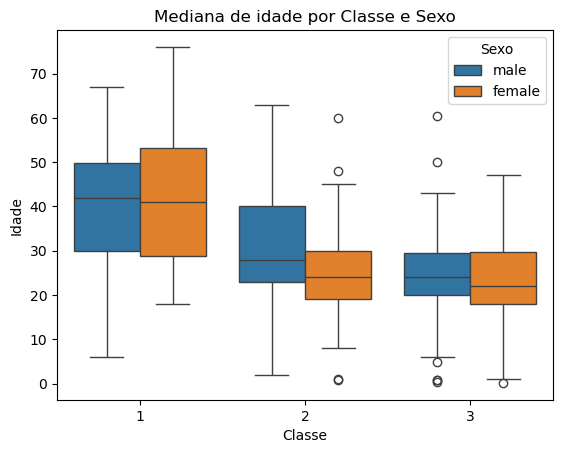

In [142]:
#Usando o gráfico de barras agrupado(Seaborn)
sns.boxplot(x='Classe',y='Idade',hue='Sexo', data=dados)
plt.title('Mediana de idade por Classe e Sexo')
plt.show()


In [143]:
#Substituindo os valores nulos pela idade e mediana
dados['Idade'] = dados.groupby(['Classe', 'Sexo'])['Idade'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#Verificando se houve mudanças
dados.isnull().sum()

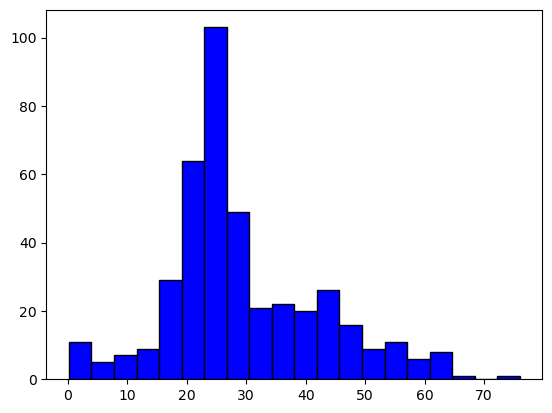

In [164]:
#Usando o histograma de Idade
plt.hist(dados['Idade'], bins=20, color='blue', edgecolor='black')
plt.show()

In [146]:
dados['Idade'].describe()

count    418.000000
mean      29.297847
std       13.038856
min        0.170000
25%       22.000000
50%       25.000000
75%       36.375000
max       76.000000
Name: Idade, dtype: float64

##### Tratando Classe

In [151]:
#Vrificando o tipo de dado
dados['Classe'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Classe
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [153]:
#verificando se há valores nulos
dados['Classe'].isnull().sum()

np.int64(0)

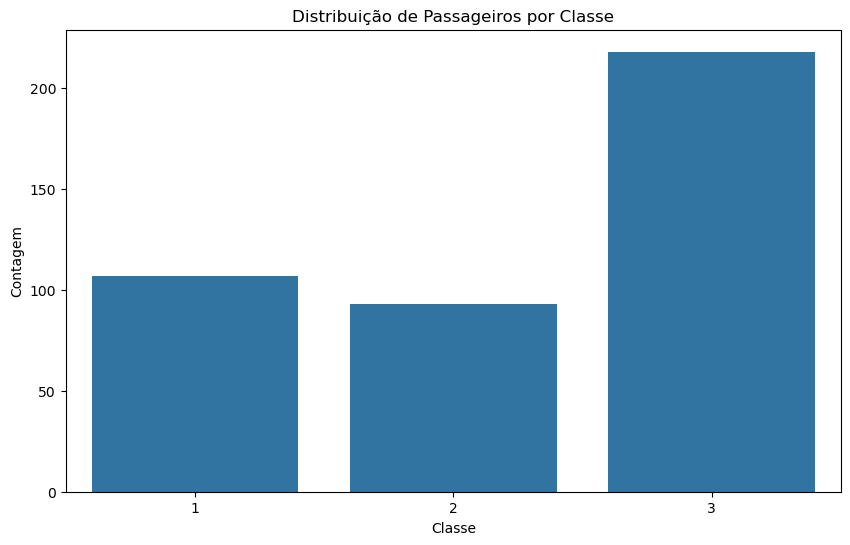

In [157]:
#Distribuição de passageiros por classe
plt.figure(figsize=(10, 6))
sns.countplot(x='Classe', data=dados)
plt.title('Distribuição de Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

##### Tratando Cabine

In [159]:
#Verificando se há dados nulos 
dados.isnull().sum()

Passageiro-ID      0
Sobrevivente       0
Classe             0
Nome               0
Sexo               0
Idade              0
Parentes           0
Pais/filhos        0
NBilhete           0
ValorTarifa        1
Cabine           327
Embarque           0
dtype: int64

In [161]:
#Verificando a descrição dos dados nulos
dados['Cabine'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabine, dtype: object

C:\Users\aiane\AppData\Local\Temp\ipykernel_10784\3633234095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Cabine_Letra'] = filtrado['Cabine'].str[0]


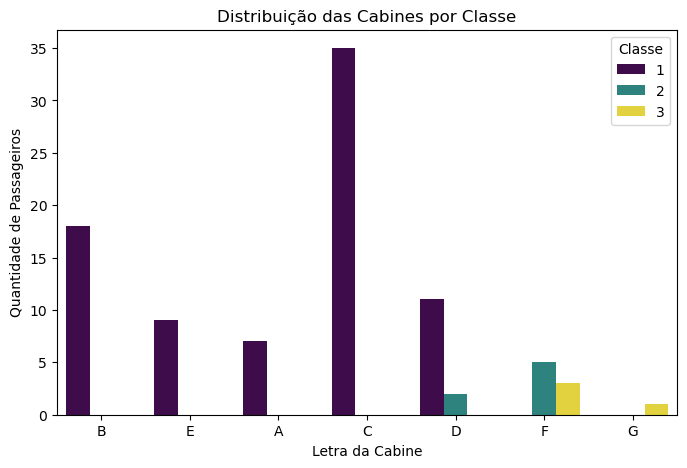

In [169]:
# Filtra os dados onde 'Cabine' não é nulo
filtrado = dados.dropna(subset=['Cabine'])

# Usa apenas a primeira letra da cabine
filtrado['Cabine_Letra'] = filtrado['Cabine'].str[0]

plt.figure(figsize=(8, 5))
sns.countplot(x=filtrado['Cabine_Letra'], hue=filtrado['Classe'], palette='viridis')
plt.xlabel('Letra da Cabine')
plt.ylabel('Quantidade de Passageiros')
plt.title('Distribuição das Cabines por Classe')
plt.legend(title='Classe')
plt.show()

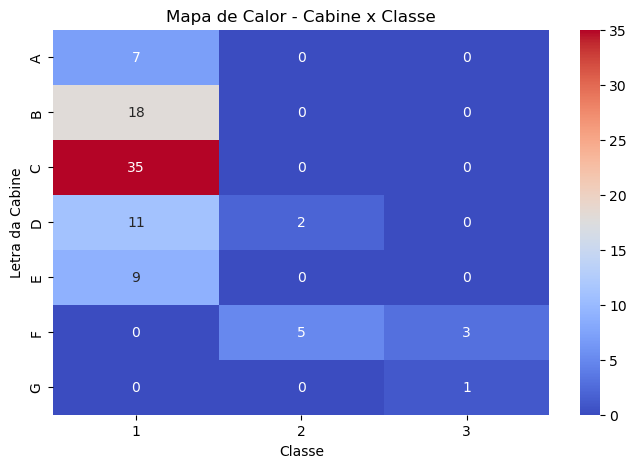

In [171]:
tabela = pd.crosstab(filtrado['Cabine_Letra'], filtrado['Classe'])

plt.figure(figsize=(8,5))
sns.heatmap(tabela, annot=True, cmap='coolwarm', fmt='d')
plt.title('Mapa de Calor - Cabine x Classe')
plt.xlabel('Classe')
plt.ylabel('Letra da Cabine')
plt.show()

In [173]:
#Como se pode observer. Cabine não irá influenciar os dados, iremos remover a coluna 
dados.drop(columns=['Cabine'], inplace=True)

In [174]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Passageiro-ID  418 non-null    int64  
 1   Sobrevivente   418 non-null    int64  
 2   Classe         418 non-null    int64  
 3   Nome           418 non-null    object 
 4   Sexo           418 non-null    object 
 5   Idade          418 non-null    float64
 6   Parentes       418 non-null    int64  
 7   Pais/filhos    418 non-null    int64  
 8   NBilhete       418 non-null    object 
 9   ValorTarifa    417 non-null    float64
 10  Embarque       418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


##### Tratando Valortarifa

In [191]:
dados['ValorTarifa'].isnull().sum()

np.int64(0)

In [180]:
#Substiuindo o valor nulo de tarifa pela média
dados['ValorTarifa'] = dados['ValorTarifa'].fillna(dados['ValorTarifa'].mean())

In [181]:
#verificando
dados.isnull().sum()

Passageiro-ID    0
Sobrevivente     0
Classe           0
Nome             0
Sexo             0
Idade            0
Parentes         0
Pais/filhos      0
NBilhete         0
ValorTarifa      0
Embarque         0
dtype: int64

##### Dispersão entre idade e tarifa

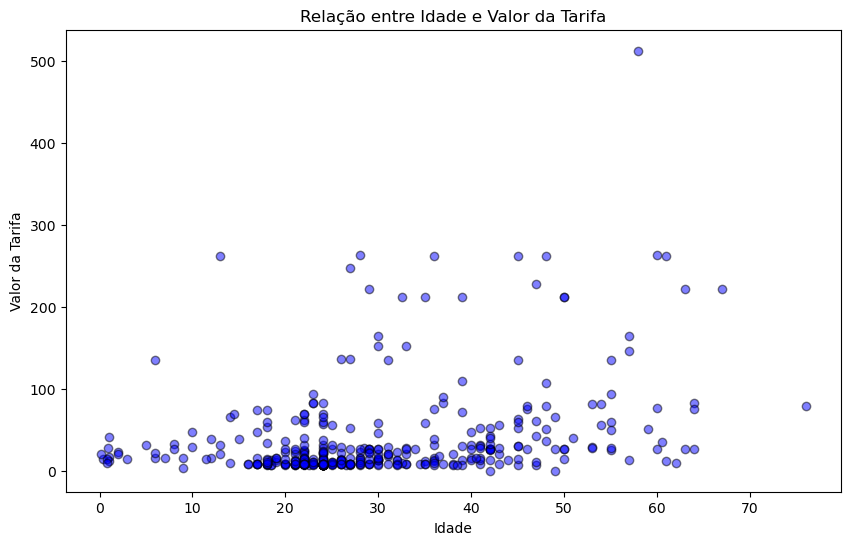

In [185]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['Idade'], dados['ValorTarifa'], alpha=0.5, color='blue', edgecolors='black')
plt.title('Relação entre Idade e Valor da Tarifa')
plt.xlabel('Idade')
plt.ylabel('Valor da Tarifa')
plt.show()